# **Loading Data**

In [ ]:
!pip install bertopic top2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but yo

In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

from bertopic import BERTopic
from top2vec import Top2Vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df_with_stopwords = pd.read_csv('Preprocessed_MBG.csv')
df_with_stopwords.head()

Unnamed: 0  Tweet Count                                   Username  \
0           0            1                                Fadli Dinul   
1           1            2  JANGAN DITUNGGUIN DAN DITAGIH UPDATE AU🙏🏻   
2           2            3                                  nugrahagu   
3           3            4                          Bulliever Shinobi   
4           4            5                       Humas Polres Nganjuk   

                                                Text  \
0                       me program mbg alias gajelas   
1  kapan orang yang tidak pernah commute pake tra...   
2  lihatlah indonesia bikin program mbg sebelumny...   
3  enteng banget nyuruh inovasi hasil pengorbanan...   
4  program makan bergizi gratis mbg polres nganju...   

                       Created At  Retweets  Likes  
0  Fri Jan 31 23:51:53 +0000 2025         0      8  
1  Fri Jan 31 23:49:29 +0000 2025         1      7  
2  Fri Jan 31 23:44:39 +0000 2025         0      0  
3  Fri Jan 31 23:35:47 +0000 2025         0      5  
4  Fri Jan 31 23:33:55 +0000 2025         0      6

In [ ]:
df_without_stopwords = pd.read_csv('PreprocessedWithoutStopwords_MBG.csv')
df_without_stopwords.head()

Unnamed: 0  Tweet Count                                   Username  \
0           0            1                                Fadli Dinul   
1           1            2  JANGAN DITUNGGUIN DAN DITAGIH UPDATE AU🙏🏻   
2           2            3                                  nugrahagu   
3           3            4                          Bulliever Shinobi   
4           4            5                       Humas Polres Nganjuk   

                                                Text  \
0                       me program mbg alias gajelas   
1  orang commute pake transum stop ngerecokin keb...   
2  lihatlah indonesia bikin program mbg bikin ikn...   
3  enteng banget nyuruh inovasi hasil pengorbanan...   
4  program makan bergizi gratis mbg polres nganju...   

                       Created At  Retweets  Likes  
0  Fri Jan 31 23:51:53 +0000 2025         0      8  
1  Fri Jan 31 23:49:29 +0000 2025         1      7  
2  Fri Jan 31 23:44:39 +0000 2025         0      0  
3  Fri Jan 31 23:35:47 +0000 2025         0      5  
4  Fri Jan 31 23:33:55 +0000 2025         0      6

In [ ]:
df_with_stopwords['clean_text'] = df_with_stopwords['Text']
df_without_stopwords['clean_text'] = df_without_stopwords['Text']

# **BERTopic First Attempt**

In [ ]:
df = df_with_stopwords

In [ ]:
from gensim.models import CoherenceModel

import gensim.corpora as corpora

def compute_coherence(df, topic_model):
  documents = pd.DataFrame({"Document": df['clean_text'],
                            "ID": range(len(df['clean_text'])),
                            "Topic": topics})
  documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
  cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

  # Extract vectorizer and analyzer from BERTopic
  vectorizer = topic_model.vectorizer_model
  analyzer = vectorizer.build_analyzer()

  # Extract features for Topic Coherence evaluation
  tokens = [analyzer(doc) for doc in cleaned_docs]
  dictionary = corpora.Dictionary(tokens)
  corpus = [dictionary.doc2bow(token) for token in tokens]
  topic_words = [[words for words, _ in topic_model.get_topic(topic)]
                for topic in range(len(set(topics))-1)]

  # Evaluate
  coherence_model = CoherenceModel(topics=topic_words,
                                  texts=tokens,
                                  corpus=corpus,
                                  dictionary=dictionary,
                                  coherence='c_v')
  return coherence_model.get_coherence()

In [ ]:
def compute_coherence(df, topic_model, topics):
    docs = df['clean_text'].tolist()

    documents = pd.DataFrame({"Document": docs,
                              "ID": range(len(docs)),
                              "Topic": topics})

    documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
    cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

    vectorizer = topic_model.vectorizer_model
    analyzer = vectorizer.build_analyzer()
    tokens = [analyzer(doc) for doc in cleaned_docs]
    dictionary = corpora.Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]

    topic_words = [[word for word, _ in topic_model.get_topic(topic)]
                   for topic in range(len(set(topics))-1)]  # skip -1 topic

    coherence_model = CoherenceModel(topics=topic_words,
                                     texts=tokens,
                                     corpus=corpus,
                                     dictionary=dictionary,
                                     coherence='c_v')
    return coherence_model.get_coherence()


In [ ]:
def compute_topic_diversity(topic_model, topk=10):
  topics = topic_model.get_topics()
  topic_words = [words[:topk] for words in topics.values()]
  all_words = [word for topic in topic_words for word in topic]
  unique_words = set(all_words)
  return len(unique_words) / len(all_words)

def tune_bertopic(df,
                  embedding_models=["distiluse-base-multilingual-cased-v1",
                                    "paraphrase-multilingual-MiniLM-L12-v2",
                                    "all-MiniLM-L6-v2"],
                  umap_neighbors=[5, 10, 15],
                  umap_components=[5],
                  hdbscan_min_cluster_size=[5, 10, 15],
                  min_topic_size=[10]):

    results = []
    best_model, best_score = None, -1
    docs = df['clean_text'].tolist()

    for emb in embedding_models:
        embedding_model = SentenceTransformer(emb)

        for n_neighbors in umap_neighbors:
            for n_components in umap_components:
                umap_model = UMAP(n_neighbors=n_neighbors,
                                  n_components=n_components,
                                  min_dist=0.0,
                                  metric="cosine",
                                  random_state=42)

                for min_cluster in hdbscan_min_cluster_size:
                        hdbscan_model = HDBSCAN(min_cluster_size=min_cluster,
                                                metric="euclidean",
                                                cluster_selection_method="eom",
                                                prediction_data=True)

                        for mts in min_topic_size:
                            print(f"Testing: {emb}, n_neighbors={n_neighbors}, "
                                  f"n_components={n_components}, min_cluster={min_cluster}, "
                                  f"min_topic_size={mts}")

                            vectorizer_model = CountVectorizer()

                            topic_model = BERTopic(
                                embedding_model=embedding_model,
                                umap_model=umap_model,
                                hdbscan_model=hdbscan_model,
                                vectorizer_model=vectorizer_model,
                                ctfidf_model=ClassTfidfTransformer(),
                                min_topic_size=mts
                            )

                            try:
                                topics, probs = topic_model.fit_transform(docs)

                                # Compute coherence using your custom function
                                coherence = compute_coherence(df.assign(clean_text=docs), topic_model, topics)
                                diversity = compute_topic_diversity(topic_model, topk=10)

                                score = coherence * 0.7 + diversity * 0.3
                                results.append({
                                    "embedding": emb,
                                    "n_neighbors": n_neighbors,
                                    "n_components": n_components,
                                    "min_cluster_size": min_cluster,
                                    "min_topic_size": mts,
                                    "coherence": coherence,
                                    "diversity": diversity,
                                    "score": score
                                })

                                if score > best_score:
                                    best_model, best_score = topic_model, score

                            except Exception as e:
                                print(f"⚠️ Error with {emb}, params: {e}")

    results_df = pd.DataFrame(results)
    return best_model, results_df


In [ ]:
best_model, results_df = tune_bertopic(df)

print("Best Model:", best_model)
print(results_df.sort_values(by="score", ascending=False).head())

Testing: distiluse-base-multilingual-cased-v1, n_neighbors=5, n_components=5, min_cluster=5, min_topic_size=10
Testing: distiluse-base-multilingual-cased-v1, n_neighbors=5, n_components=5, min_cluster=10, min_topic_size=10
Testing: distiluse-base-multilingual-cased-v1, n_neighbors=5, n_components=5, min_cluster=15, min_topic_size=10
Testing: distiluse-base-multilingual-cased-v1, n_neighbors=10, n_components=5, min_cluster=5, min_topic_size=10
Testing: distiluse-base-multilingual-cased-v1, n_neighbors=10, n_components=5, min_cluster=10, min_topic_size=10
Testing: distiluse-base-multilingual-cased-v1, n_neighbors=10, n_components=5, min_cluster=15, min_topic_size=10
Testing: distiluse-base-multilingual-cased-v1, n_neighbors=15, n_components=5, min_cluster=5, min_topic_size=10
Testing: distiluse-base-multilingual-cased-v1, n_neighbors=15, n_components=5, min_cluster=10, min_topic_size=10
Testing: distiluse-base-multilingual-cased-v1, n_neighbors=15, n_components=5, min_cluster=15, min_top

In [ ]:
results_df.sort_values(by="score", ascending=False)

embedding  n_neighbors  n_components  \
12  paraphrase-multilingual-MiniLM-L12-v2           10             5   
9   paraphrase-multilingual-MiniLM-L12-v2            5             5   
18                       all-MiniLM-L6-v2            5             5   
21                       all-MiniLM-L6-v2           10             5   
3    distiluse-base-multilingual-cased-v1           10             5   
15  paraphrase-multilingual-MiniLM-L12-v2           15             5   
24                       all-MiniLM-L6-v2           15             5   
0    distiluse-base-multilingual-cased-v1            5             5   
6    distiluse-base-multilingual-cased-v1           15             5   
13  paraphrase-multilingual-MiniLM-L12-v2           10             5   
25                       all-MiniLM-L6-v2           15             5   
22                       all-MiniLM-L6-v2           10             5   
16  paraphrase-multilingual-MiniLM-L12-v2           15             5   
1    distiluse-base-multilingual-cased-v1            5             5   
4    distiluse-base-multilingual-cased-v1           10             5   
7    distiluse-base-multilingual-cased-v1           15             5   
10  paraphrase-multilingual-MiniLM-L12-v2            5             5   
14  paraphrase-multilingual-MiniLM-L12-v2           10             5   
19                       all-MiniLM-L6-v2            5             5   
26                       all-MiniLM-L6-v2           15             5   
5    distiluse-base-multilingual-cased-v1           10             5   
11  paraphrase-multilingual-MiniLM-L12-v2            5             5   
17  paraphrase-multilingual-MiniLM-L12-v2           15             5   
2    distiluse-base-multilingual-cased-v1            5             5   
23                       all-MiniLM-L6-v2           10             5   
8    distiluse-base-multilingual-cased-v1           15             5   
20                       all-MiniLM-L6-v2            5             5   

    min_cluster_size  min_topic_size  coherence  diversity     score  
12                 5              10   0.730804   0.998742  0.811186  
9                  5              10   0.725385   0.993494  0.805818  
18                 5              10   0.720821   0.997400  0.803795  
21                 5              10   0.712785   0.999023  0.798656  
3                  5              10   0.711709   0.998083  0.797621  
15                 5              10   0.708038   0.998092  0.795054  
24                 5              10   0.706235   0.999654  0.794261  
0                  5              10   0.699584   0.992327  0.787407  
6                  5              10   0.694964   0.998545  0.786039  
13                10              10   0.672340   0.998507  0.770191  
25                10              10   0.660326   1.000000  0.762228  
22                10              10   0.653543   1.000000  0.757480  
16                10              10   0.649230   0.997436  0.753692  
1                 10              10   0.647800   0.998413  0.752984  
4                 10              10   0.646248   0.997419  0.751599  
7                 10              10   0.637249   0.997917  0.745450  
10                10              10   0.635686   0.998352  0.744486  
14                15              10   0.632843   0.996341  0.741892  
19                10              10   0.629108   1.000000  0.740376  
26                15              10   0.627747   1.000000  0.739423  
5                 15              10   0.623002   0.996262  0.734980  
11                15              10   0.621312   0.996226  0.733786  
17                15              10   0.618616   0.996000  0.731831  
2                 15              10   0.610529   0.998246  0.726844  
23                15              10   0.605216   1.000000  0.723651  
8                 15              10   0.600738   1.000000  0.720516  
20                15              10   0.594853   1.000000  0.716397

In [ ]:
df = df_without_stopwords

best_model, results_df = tune_bertopic(df)

print("Best Model:", best_model)
print(results_df.sort_values(by="score", ascending=False).head())

Testing: distiluse-base-multilingual-cased-v1, n_neighbors=5, n_components=5, min_cluster=5, min_topic_size=10
Testing: distiluse-base-multilingual-cased-v1, n_neighbors=5, n_components=5, min_cluster=10, min_topic_size=10
Testing: distiluse-base-multilingual-cased-v1, n_neighbors=5, n_components=5, min_cluster=15, min_topic_size=10
Testing: distiluse-base-multilingual-cased-v1, n_neighbors=10, n_components=5, min_cluster=5, min_topic_size=10
Testing: distiluse-base-multilingual-cased-v1, n_neighbors=10, n_components=5, min_cluster=10, min_topic_size=10
Testing: distiluse-base-multilingual-cased-v1, n_neighbors=10, n_components=5, min_cluster=15, min_topic_size=10
Testing: distiluse-base-multilingual-cased-v1, n_neighbors=15, n_components=5, min_cluster=5, min_topic_size=10
Testing: distiluse-base-multilingual-cased-v1, n_neighbors=15, n_components=5, min_cluster=10, min_topic_size=10
Testing: distiluse-base-multilingual-cased-v1, n_neighbors=15, n_components=5, min_cluster=15, min_top

In [ ]:
results_df.sort_values(by="score", ascending=False)

embedding  n_neighbors  n_components  \
12  paraphrase-multilingual-MiniLM-L12-v2           10             5   
18                       all-MiniLM-L6-v2            5             5   
9   paraphrase-multilingual-MiniLM-L12-v2            5             5   
21                       all-MiniLM-L6-v2           10             5   
3    distiluse-base-multilingual-cased-v1           10             5   
0    distiluse-base-multilingual-cased-v1            5             5   
15  paraphrase-multilingual-MiniLM-L12-v2           15             5   
24                       all-MiniLM-L6-v2           15             5   
6    distiluse-base-multilingual-cased-v1           15             5   
25                       all-MiniLM-L6-v2           15             5   
22                       all-MiniLM-L6-v2           10             5   
13  paraphrase-multilingual-MiniLM-L12-v2           10             5   
16  paraphrase-multilingual-MiniLM-L12-v2           15             5   
4    distiluse-base-multilingual-cased-v1           10             5   
1    distiluse-base-multilingual-cased-v1            5             5   
7    distiluse-base-multilingual-cased-v1           15             5   
14  paraphrase-multilingual-MiniLM-L12-v2           10             5   
26                       all-MiniLM-L6-v2           15             5   
19                       all-MiniLM-L6-v2            5             5   
5    distiluse-base-multilingual-cased-v1           10             5   
11  paraphrase-multilingual-MiniLM-L12-v2            5             5   
17  paraphrase-multilingual-MiniLM-L12-v2           15             5   
10  paraphrase-multilingual-MiniLM-L12-v2            5             5   
23                       all-MiniLM-L6-v2           10             5   
8    distiluse-base-multilingual-cased-v1           15             5   
2    distiluse-base-multilingual-cased-v1            5             5   
20                       all-MiniLM-L6-v2            5             5   

    min_cluster_size  min_topic_size  coherence  diversity     score  
12                 5              10   0.726388   0.999054  0.808187  
18                 5              10   0.720821   0.997400  0.803795  
9                  5              10   0.720378   0.993253  0.802241  
21                 5              10   0.712785   0.999023  0.798656  
3                  5              10   0.711709   0.998083  0.797621  
0                  5              10   0.710736   0.993095  0.795444  
15                 5              10   0.708038   0.998092  0.795054  
24                 5              10   0.706235   0.999654  0.794261  
6                  5              10   0.694964   0.998545  0.786039  
25                10              10   0.660326   1.000000  0.762228  
22                10              10   0.653543   1.000000  0.757480  
13                10              10   0.650264   0.997710  0.754497  
16                10              10   0.649230   0.997436  0.753692  
4                 10              10   0.646248   0.997419  0.751599  
1                 10              10   0.638061   0.997872  0.746004  
7                 10              10   0.637249   0.997917  0.745450  
14                15              10   0.632143   0.996429  0.741429  
26                15              10   0.627747   1.000000  0.739423  
19                10              10   0.626133   1.000000  0.738293  
5                 15              10   0.623002   0.996262  0.734980  
11                15              10   0.618989   0.997000  0.732392  
17                15              10   0.618616   0.996000  0.731831  
10                10              10   0.615506   0.998361  0.730362  
23                15              10   0.605216   1.000000  0.723651  
8                 15              10   0.600738   1.000000  0.720516  
2                 15              10   0.596321   0.997479  0.716668  
20                15              10   0.594580   0.999153  0.715952

In [ ]:
model_configs = [
    {
        "name": "paraphrase-multilingual-MiniLM-L12-v2",
        "umap": UMAP(n_neighbors=10, n_components=5, min_dist=0.0, metric='cosine', random_state=42),
        "hdbscan": HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom', prediction_data=True),
        "min_topic_size": 10
    },
    {
        "name": "all-MiniLM-L6-v2",
        "umap": UMAP(n_neighbors=5, n_components=5, min_dist=0.1, metric='cosine', random_state=42),
        "hdbscan": HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='leaf', prediction_data=True),
        "min_topic_size": 10
    },
    {
        "name": "distiluse-base-multilingual-cased-v1",
        "umap": UMAP(n_neighbors=10, n_components=5, min_dist=0.0, metric='cosine', random_state=42),
        "hdbscan": HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom', prediction_data=True),
        "min_topic_size": 10
    }
]


In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

topic_models = {}

for config in model_configs:
    print(f"Training {config['name']} ...")
    topic_model = BERTopic(
        embedding_model=config["name"],
        umap_model=config["umap"],
        hdbscan_model=config["hdbscan"],
        vectorizer_model=CountVectorizer(),
        ctfidf_model=ClassTfidfTransformer(),
        min_topic_size=config["min_topic_size"]
    )

    docs = df_with_stopwords['clean_text']
    topics, probs = topic_model.fit_transform(docs)
    topic_models[config["name"]] = topic_model


Training paraphrase-multilingual-MiniLM-L12-v2 ...
Training all-MiniLM-L6-v2 ...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Training distiluse-base-multilingual-cased-v1 ...


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplot grid (1 row, 3 columns)
fig = make_subplots(rows=1, cols=3, subplot_titles=[name for name in topic_models.keys()])

for i, (name, model) in enumerate(topic_models.items(), start=1):
    viz = model.visualize_topics()
    for trace in viz['data']:
        fig.add_trace(trace, row=1, col=i)

    # Keep consistent layout
    fig.update_xaxes(title_text="x", row=1, col=i)
    fig.update_yaxes(title_text="y", row=1, col=i)

fig.update_layout(title_text="Topic Model Comparison", showlegend=False)
fig.show()


In [ ]:
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic import BERTopic

# Step 1: Embeddings
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

# Step 2: UMAP for clustering (higher dimensionality first!)
umap_model = UMAP(n_neighbors=10,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=42)

# Step 3: HDBSCAN clustering
hdbscan_model = HDBSCAN(min_cluster_size=5,
                        metric='euclidean',
                        cluster_selection_method='eom',
                        prediction_data=True)

# Step 4: Vectorization & c-TF-IDF
vectorizer_model = CountVectorizer()
ctfidf_model = ClassTfidfTransformer()

# Step 5: BERTopic model
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    ctfidf_model=ctfidf_model,
    min_topic_size=10
)

docs = df_with_stopwords['clean_text']
topics, probs = topic_model.fit_transform(docs)

# Step 6: Visualizations
topic_model.visualize_topics()


In [ ]:
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

# Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Reduce dimensionality
umap_model = UMAP(n_neighbors=5, n_components=2, metric='cosine')

# Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=3, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# Tokenize topics
vectorizer_model = CountVectorizer()

# Create topic representation
ctfidf_model = ClassTfidfTransformer()

topic_model = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  min_topic_size=10
)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/268 [00:00<?, ?it/s]

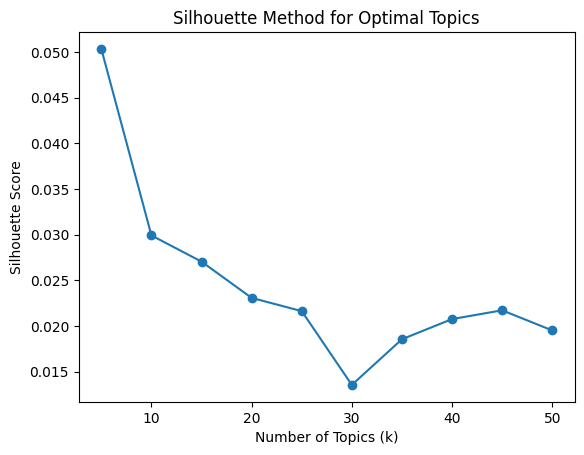

Best number of topics by silhouette: 5


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get embeddings from SentenceTransformer
embeddings = embedding_model.encode(docs, show_progress_bar=True)

# Step 2: Test different k values
range_n_topics = range(5, 51, 5)  # test from 5 to 50 topics
silhouette_scores = []

for k in range_n_topics:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    silhouette_scores.append(score)

# Step 3: Plot Silhouette Scores
plt.plot(range_n_topics, silhouette_scores, marker='o')
plt.xlabel("Number of Topics (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal Topics")
plt.show()

best_k = range_n_topics[np.argmax(silhouette_scores)]
print("Best number of topics by silhouette:", best_k)


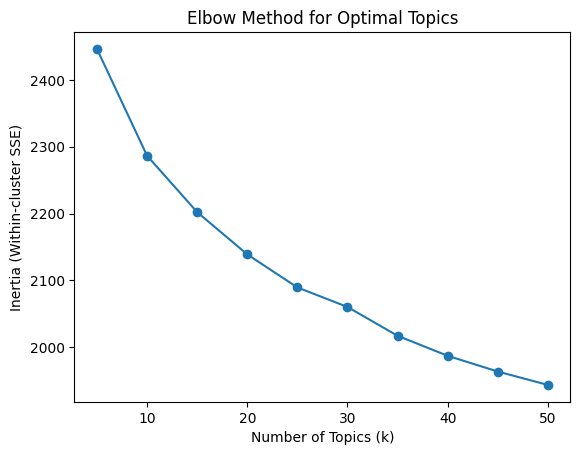

In [ ]:
inertias = []

for k in range_n_topics:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    inertias.append(kmeans.inertia_)

plt.plot(range_n_topics, inertias, marker='o')
plt.xlabel("Number of Topics (k)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.title("Elbow Method for Optimal Topics")
plt.show()


In [ ]:
topics, probs = topic_model.fit_transform(df['clean_text'])

In [ ]:
from gensim.models import CoherenceModel

import gensim.corpora as corpora

documents = pd.DataFrame({"Document": df['clean_text'],
                          "ID": range(len(df['clean_text'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
# words = vectorizer.get_feature_names()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)]
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
bertopic_coherence = coherence_model.get_coherence()
print(bertopic_coherence)

0.7664848041115949


In [ ]:
# print("Training BERTopic...")
# bertopic_model = BERTopic(language="indonesian", calculate_probabilities=True, verbose=True)
# topics, probs = bertopic_model.fit_transform(df['clean_text'])

# # Visualisasi topik BERTopic
topic_model.visualize_barchart(top_n_topics=10)
topic_model.visualize_topics()

# **Top2Vec First Attempt**

In [ ]:
from top2vec import Top2Vec
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

def tune_top2vec(docs, cluster_size_values=[5, 10, 20], neighbor_values=[10, 15, 30]):
    best_model, best_score = None, -1
    results = []

    # Prepare dictionary once
    tokenized_docs = [d.split() for d in docs]
    dictionary = Dictionary(tokenized_docs)

    for min_cluster_size in cluster_size_values:
        for n_neighbors in neighbor_values:
            print(f"Testing: min_cluster_size={min_cluster_size}, n_neighbors={n_neighbors}")
            model = Top2Vec(
                documents=docs,
                embedding_model="distiluse-base-multilingual-cased",  # ✅ valid
                speed="learn",
                umap_args={
                    'n_neighbors': n_neighbors,
                    'n_components': 5,
                    'min_dist': 0.0,
                    'metric': 'cosine'
                },
                hdbscan_args={
                    'min_cluster_size': min_cluster_size,
                    'metric': 'euclidean'
                }
            )

            # Extract topics
            topic_words, _, _ = model.get_topics()

            # Compute coherence
            cm = CoherenceModel(
                topics=topic_words,
                texts=tokenized_docs,
                dictionary=dictionary,
                coherence='c_v'
            )
            score = cm.get_coherence()
            results.append((min_cluster_size, n_neighbors, score))

            if score > best_score:
                best_model, best_score = model, score

    return best_model, results


docs = df['clean_text'].astype(str).tolist()
tune_top2vec(docs)

2025-08-20 14:00:29,303 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Testing: min_cluster_size=5, n_neighbors=10


2025-08-20 14:00:30,631 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model
2025-08-20 14:00:33,059 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-08-20 14:00:45,707 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2025-08-20 14:00:56,717 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2025-08-20 14:00:56,972 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2025-08-20 14:01:03,792 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Testing: min_cluster_size=5, n_neighbors=15


2025-08-20 14:01:04,572 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model
2025-08-20 14:01:06,659 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-08-20 14:01:19,212 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2025-08-20 14:01:32,374 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2025-08-20 14:01:32,627 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2025-08-20 14:01:38,065 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Testing: min_cluster_size=5, n_neighbors=30


2025-08-20 14:01:38,575 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model
2025-08-20 14:01:40,546 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-08-20 14:01:53,221 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2025-08-20 14:02:10,713 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2025-08-20 14:02:10,958 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2025-08-20 14:02:17,075 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Testing: min_cluster_size=10, n_neighbors=10


2025-08-20 14:02:17,658 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model
2025-08-20 14:02:19,487 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-08-20 14:02:32,126 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2025-08-20 14:02:43,194 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2025-08-20 14:02:43,436 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2025-08-20 14:02:46,575 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Testing: min_cluster_size=10, n_neighbors=15


2025-08-20 14:02:47,073 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model
2025-08-20 14:02:48,875 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-08-20 14:03:01,477 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2025-08-20 14:03:14,578 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2025-08-20 14:03:14,815 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2025-08-20 14:03:18,405 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Testing: min_cluster_size=10, n_neighbors=30


2025-08-20 14:03:18,893 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model
2025-08-20 14:03:20,629 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-08-20 14:03:33,197 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2025-08-20 14:03:50,649 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2025-08-20 14:03:50,879 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2025-08-20 14:03:53,145 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Testing: min_cluster_size=20, n_neighbors=10


2025-08-20 14:03:54,033 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model
2025-08-20 14:03:55,808 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-08-20 14:04:08,442 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2025-08-20 14:04:19,340 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2025-08-20 14:04:19,577 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2025-08-20 14:04:21,050 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Testing: min_cluster_size=20, n_neighbors=15


2025-08-20 14:04:21,539 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model
2025-08-20 14:04:23,567 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-08-20 14:04:36,248 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2025-08-20 14:04:49,190 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2025-08-20 14:04:49,416 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2025-08-20 14:04:50,955 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Testing: min_cluster_size=20, n_neighbors=30


2025-08-20 14:04:51,432 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
INFO:top2vec:Downloading distiluse-base-multilingual-cased model
2025-08-20 14:04:53,346 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-08-20 14:05:06,053 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2025-08-20 14:05:24,269 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2025-08-20 14:05:24,521 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


(<top2vec.top2vec.Top2Vec at 0x7910de54d6a0>,
 [(5, 10, 0.35539273982856406),
  (5, 15, 0.35456856514067475),
  (5, 30, 0.35658134408745124),
  (10, 10, 0.36028772701541745),
  (10, 15, 0.35306959051134357),
  (10, 30, 0.3537214744055196),
  (20, 10, 0.3448766508983876),
  (20, 15, 0.35157943917884243),
  (20, 30, 0.35255087319485484)])

In [ ]:
# NOT FINAL CHECK AGAIN

print("Training Top2Vec...")
top2vec_model = Top2Vec(
    documents=df['clean_text'].tolist(),
    speed="learn",
    workers=4,
    embedding_model='universal-sentence-encoder'
)

2025-08-15 11:46:04,070 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Training Top2Vec...


2025-08-15 11:46:04,746 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2025-08-15 11:46:26,386 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-08-15 11:46:33,590 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2025-08-15 11:46:52,696 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2025-08-15 11:46:53,872 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


Topik terbesar: 7773 tweets


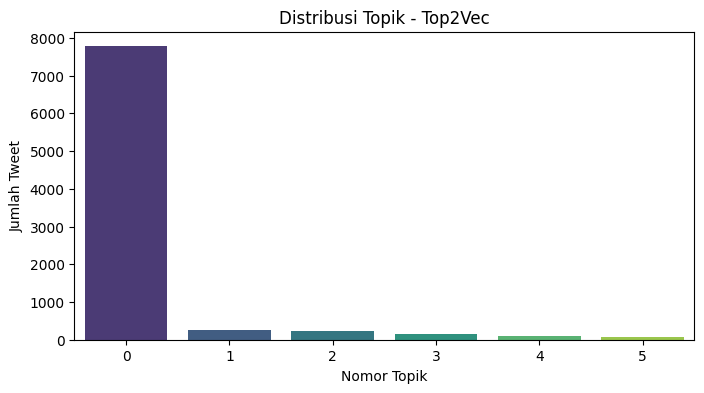

In [ ]:
# NOT FINAL CHECK AGAIN

topic_sizes, topic_nums = top2vec_model.get_topic_sizes()
print(f"Topik terbesar: {topic_sizes[0]} tweets")

# Visualisasi distribusi topik Top2Vec
plt.figure(figsize=(8,4))
sns.barplot(x=topic_nums, y=topic_sizes, palette='viridis')
plt.title("Distribusi Topik - Top2Vec")
plt.xlabel("Nomor Topik")
plt.ylabel("Jumlah Tweet")
plt.show()

In [ ]:
# NOT FINAL CHECK AGAIN

from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

def coherence_score(texts, topics_words):
    # Membuat dictionary & corpus
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    cm = CoherenceModel(
        topics=topics_words,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    return cm.get_coherence()

tokenized_texts = [t.split() for t in df['clean_text']]

In [ ]:
# NOT FINAL CHECK AGAIN

top2vec_words = []
for t in topic_nums:
    words, _ = top2vec_model.get_topics()[0][t], top2vec_model.get_topics()[1][t]
    top2vec_words.append(words)

top2vec_coherence = coherence_score(tokenized_texts, top2vec_words)

Coherence Score BERTopic: 0.7537
Coherence Score Top2Vec:  0.4009


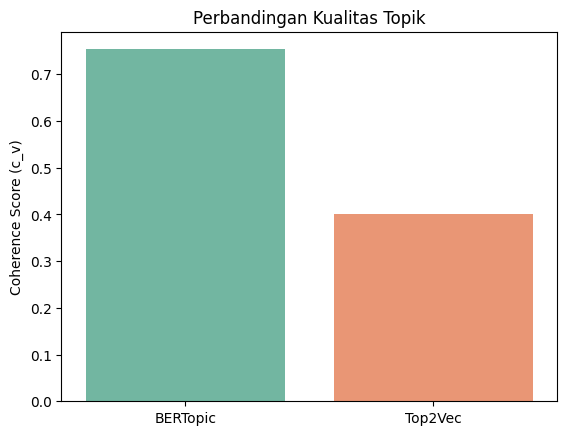

In [ ]:
# TOP2VEC NOT FINAL CHECK AGAIN

print(f"Coherence Score BERTopic: {bertopic_coherence:.4f}")
print(f"Coherence Score Top2Vec:  {top2vec_coherence:.4f}")

sns.barplot(
    x=['BERTopic', 'Top2Vec'],
    y=[bertopic_coherence, top2vec_coherence],
    palette='Set2'
)
plt.ylabel("Coherence Score (c_v)")
plt.title("Perbandingan Kualitas Topik")
plt.show()